In [1]:
%load_ext autoreload
%autoreload 2
import feature_extract
import sys
sys.path.append("..")
import torch
import psql_methods as psql
import pickle
import alchemy_methods as alc
from tqdm import tqdm
import numpy as np
import image_utils as imgs
import opensea_methods as opse
import multiprocessing
import pandas as pd
import feature_utils as feat
import matplotlib.pyplot as plt
import counterfeit_utils as cfu
from scipy import stats

In [4]:
command = "select distinct slug from objective_cf_num"
rows = psql.execute_commands([command])
slugs = [row[0] for row in rows]
command = "select distinct slug from cf_sales"
rows = psql.execute_commands([command])
done_slugs = [row[0] for row in rows]
print(len(done_slugs))
slugs_left = [x for x in slugs if x not in done_slugs]
slugs_left

103


['thecaptainz']

In [ ]:
#This pulls slugs which have counterfeits stored but no sales
sales = []
command = "Insert into cf_sales (slug,token_id,seller,buyer,timestamp,sale_price,payment_token,transaction) Values (%s,%s,%s,%s,%s,%s,%s,%s)"
for slug in slugs_left:
    sales = opse.pull_sales_data(collection_slug=slug)
    psql.batch_insert(command,sales)



('coolpetsnft', '18234', '0xaf5c4f0ddd48a6e5ae81538c401d8a6147b2411a', '0x1e2ab2c1ee48aa5c705e6a638087bf7fc1877095', 1692457799, 0.030000000000000002, 'WETH', '0x61e0082250f679cf3622d33ab188ac71af12019605cb233ad16115ec1642628c')
2023-08-19 15:09:59
('coolpetsnft', '943', '0xd502b0383fbf710da7c85614810f6ea109bb7ac2', '0xa9568370b7f9ef732fa2a5a0acdc70d80482a405', 1681788935, 0.05, 'WETH', '0xfd9987fdc65f3e681eddb4827ae5e7e987fc2d6df75d1036dad7e1a8f56a25cc')
2023-04-18 03:35:35
('coolpetsnft', '7511', '0x473b6f18a3c80a94cd736658745939aa4c72b47c', '0xfac512717266dff9f30fbb4a834a6297758f171c', 1676218343, 0.11960000000000001, 'ETH', '0xe6b4e42e97a95bcfbd5ddbaa72afe59a3b1cbf4119ac21388231532c7466f429')
2023-02-12 16:12:23
('coolpetsnft', '5248', '0x579b4721525292efb55998a40e0e4bd5519f1d1d', '0xbe19c3010005f4e0d520d071e01862926f969d6f', 1672187183, 0.10700000000000001, 'WETH', '0x02a826054791b257b978e27d1e214766e829d4346baceedeedba6328dc2cef71')
2022-12-28 00:26:23
('coolpetsnft', '11844', '0

In [26]:
sales[0]

('moonbirds-oddities',
 '6050',
 '0xa1fbc0a9ff967ce51b8ea952b35ff7005cd4cc63',
 '0x4d3db3a070d5144ec4faddd7bbabbd6ed4afcf8f',
 1710534323,
 0.045000000000000005,
 'ETH',
 '0x4fca477a1d5e998be0dffb020f340d12f0df08dcbb42fca735360c8bbe1f312f')

In [17]:
command = "Insert into cf_sales (slug,token_id,seller,buyer,timestamp,sale_price,payment_token,transaction) Values (%s,%s,%s,%s,%s,%s,%s,%s)"
psql.batch_insert(command,sales[0])

In [ ]:
ele_date = cfu.creation_date_from_db('0xmfers')
sales = cfu.sales_from_db('mfers')
day_sales = cfu.timestamps_to_dates(sales)
df_sales = pd.DataFrame(day_sales,columns=['day','price'])
df_sales.query(f"day=='{ele_date1}'")['price'].mean()

In [ ]:
ap_df = df_sales.groupby('day')['price'].mean().reset_index()
filtered_df = ap_df[ap_df['day'].str.contains('2022-02')]
print(ele_date)
filtered_df

In [6]:
mf_df = cfu.day_sales_from_db('mfers')

('2024-01-28', 0.5)


In [35]:
cfu.compute_interval(10,mf_df['day'][1000],mf_df)

(0.626739730247593, 0.519856331868132)

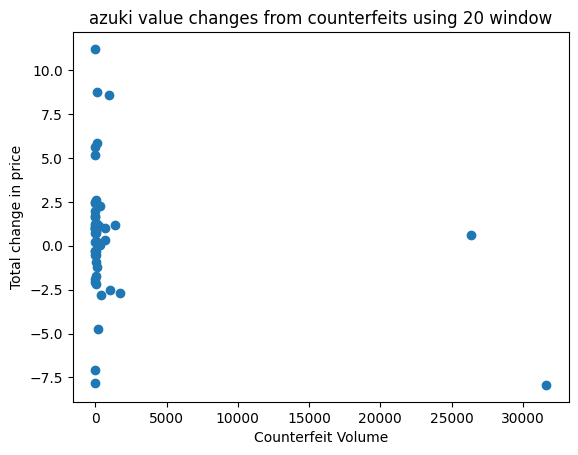

In [91]:
top_slugs = cfu.get_top_slugs()
interval = 20
for top_slug in top_slugs[15:16]:
    top_slug = 'azuki'
    if top_slug=='pudgypenguins':
        continue
    intervals = cfu.compute_all_intervals(top_slug,interval)
    y = [j[3][1]-j[3][0] for j in intervals]
    x = [j[1] for j in intervals]
    plt.scatter(x,y)
    plt.title(f"{top_slug} value changes from counterfeits using {interval} window")
    plt.xlabel("Counterfeit Volume")
    plt.ylabel("Total change in price")
    plt.show()

In [92]:
from datetime import datetime
date_objects = [datetime.strptime(date_str, '%Y-%m-%d') for _,_,date_str, _ in intervals]
print(date_objects)
min_date = min(date_objects)
max_date = max(date_objects)
print("Minimum Date:", min_date.strftime('%Y-%m-%d'))
print("Maximum Date:", max_date.strftime('%Y-%m-%d'))

[datetime.datetime(2022, 2, 4, 0, 0), datetime.datetime(2023, 6, 21, 0, 0), datetime.datetime(2023, 6, 15, 0, 0), datetime.datetime(2023, 4, 5, 0, 0), datetime.datetime(2022, 9, 25, 0, 0), datetime.datetime(2022, 7, 2, 0, 0), datetime.datetime(2022, 3, 12, 0, 0), datetime.datetime(2023, 11, 20, 0, 0), datetime.datetime(2023, 2, 28, 0, 0), datetime.datetime(2023, 7, 27, 0, 0), datetime.datetime(2022, 8, 7, 0, 0), datetime.datetime(2023, 9, 2, 0, 0), datetime.datetime(2022, 6, 15, 0, 0), datetime.datetime(2022, 9, 12, 0, 0), datetime.datetime(2022, 3, 29, 0, 0), datetime.datetime(2022, 6, 29, 0, 0), datetime.datetime(2022, 10, 14, 0, 0), datetime.datetime(2022, 2, 23, 0, 0), datetime.datetime(2023, 7, 9, 0, 0), datetime.datetime(2022, 3, 4, 0, 0), datetime.datetime(2023, 9, 7, 0, 0), datetime.datetime(2022, 9, 1, 0, 0), datetime.datetime(2022, 2, 3, 0, 0), datetime.datetime(2022, 6, 9, 0, 0), datetime.datetime(2022, 12, 22, 0, 0), datetime.datetime(2022, 9, 26, 0, 0), datetime.datetime(2

[8.580000000000002, -7.93, -7.799999999999999, 1.2400000000000002, 0.22499999999999964, 1.0, 5.850000000000001, 0.3240001000000001, -0.5483650000000004, -1.8799501000000003, -2.4949499999999993, -0.3200000000000003, 1.200000000000001, 2.5, 11.22, 1.1499999999999986, 1.6499999999999986, -2.6629999999999985, -2.8225, -1.1900000000000013, -0.3084450000000003, 2.2899000000000003, 8.783100000000001, -0.9499999999999993, 1.0, 0.3000000000000007, 1.1054999999999993, -2.0525, 5.200000000000003, -4.749999999999999, nan, 0.5999999999999996, -0.3000000000000007, 0.8500000000000005, 1.2690000000000001, 0.75, 1.700000000000001, -2.200000000000001, -1.72445, 1.0, 2.0100000000000016, 0.9300000000000006, 0.019999999999999574, 5.605500000000003, -7.09, 2.460000000000001, 2.6000000000000014, 0.20000000000000107, -0.5050000000000008, 0.7099999999999991]
0.3573928924698795
0.5467926530612247


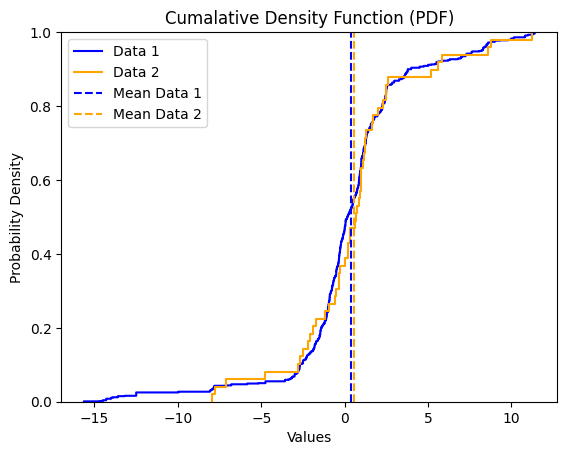

In [95]:
import seaborn as sns
sample_intervals = cfu.sample_intervals(top_slug,min_date,max_date,1000,20)
data = [j[1][1]-j[1][0] for j in sample_intervals]
fig, ax = plt.subplots()
sns.ecdfplot(data, color='blue', ax=ax, label='Data 1')
sns.ecdfplot(y, color='orange', ax=ax, label='Data 2')
data1 = [x for x in data if not np.isnan(x)]
data2 = [x for x in y if not np.isnan(x)]
mean_data1 = np.mean(data1)
mean_data2 = np.mean(data2)
print(y)
print(mean_data1)
print(mean_data2)
# Add vertical lines for the means
plt.axvline(mean_data1, color='blue', linestyle='--', label='Mean Data 1')
plt.axvline(mean_data2, color='orange', linestyle='--', label='Mean Data 2')
ax.legend()
plt.xlabel("Values")
plt.ylabel("Probability Density")
plt.title("Cumalative Density Function (PDF)")
plt.show()

In [33]:
top_slugs

['boredapeyachtclub',
 'cryptopunks',
 'azuki',
 'proof-moonbirds',
 'doodles-official',
 'pudgypenguins',
 'beanzofficial',
 'cool-cats-nft',
 'milady',
 '0n1-force',
 'world-of-women-nft',
 'cryptoadz-by-gremplin',
 'mfers',
 'goblintownwtf',
 'hapeprime',
 'invisiblefriends',
 'mekaverse',
 'adidasoriginals',
 'fluf',
 'karafuru',
 'genesis-creepz',
 'nakamigos',
 'sappy-seals',
 'kaiju-kingz',
 'cyberkongz']

In [ ]:
import logging
window_size = [1,2,5,10]
bandwidths = [100,50,25,10,5]
logging.basicConfig(filename=f'cf_value.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()
p_results = []
df_dict = {}
for bandwidth in bandwidths:
    logger.info(f"Bandwidth {bandwidth}")
    for window in window_size:
        logger.info(f"window {window}")
        results = cfu.plot_all_value_comparisons(window,50,500,5,bandwidth=bandwidth,logger=logger)
        for result in results: 
            # Compute the mean
            data = result[1]
            mean_value = np.mean(data)
            # Compute percentiles
            p_25 = np.percentile(data, 25)
            p_75 = np.percentile(data, 75)
            p_50 = np.percentile(data, 50)
            p_95 = np.percentile(data, 95)
            p_5 = np.percentile(data, 5)
            p_1 = np.percentile(data, 1)
            p_99 = np.percentile(data, 99)
            # logger.info("Percentiles Computed")
            cf_move_percentile = stats.percentileofscore(data, result[2])
            # logger.info("All results computed")
            p_results.append((result[0],p_1,p_5,p_25,p_50,p_75,p_95,p_99,result[2],cf_move_percentile,window))
    columns = ['slug','p_1','p_5','p_25','p_50','p_75','p_95','p_99','cf_move','cf_move_percentile','window_size']
    df = pd.DataFrame(p_results,columns=columns)
    df_dict[bandwidth] = df
    logging.info(df.to_string())
    p_results = []


  9%|████▎                                         | 5/54 [03:39<36:52, 45.15s/it]/global/scratch/tlundy/NFT_Research/nft_research/Dino/counterfeit_utils.py:360: RuntimeWarning: divide by zero encountered in power
  bw_scale = np.power(len(indices), -1/5)
 24%|██████████▊                                  | 13/54 [08:13<25:17, 37.00s/it]/global/scratch/tlundy/NFT_Research/nft_research/Dino/counterfeit_utils.py:360: RuntimeWarning: divide by zero encountered in power
  bw_scale = np.power(len(indices), -1/5)
 44%|████████████████████                         | 24/54 [15:15<25:35, 51.20s/it]

No creation data for slug inhabitants-generative


 54%|████████████████████████▏                    | 29/54 [20:02<18:19, 43.96s/it]/global/scratch/tlundy/NFT_Research/nft_venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/global/scratch/tlundy/NFT_Research/nft_venv/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 72%|████████████████████████████████▌            | 39/54 [26:42<10:49, 43.30s/it]

No creation data for slug inhabitants-generative


 74%|█████████████████████████████████▎           | 40/54 [26:53<07:52, 33.78s/it]/global/scratch/tlundy/NFT_Research/nft_venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/global/scratch/tlundy/NFT_Research/nft_venv/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
  9%|████▎                                         | 5/54 [03:38<36:55, 45.21s/it]/global/scratch/tlundy/NFT_Research/nft_research/Dino/counterfeit_utils.py:360: RuntimeWarning: divide by zero encountered in power
  bw_scale = np.power(len(indices), -1/5)
 24%|██████████▊                                  | 13/54 [08:13<25:19, 37.07s/it]/global/scratch/tlundy/NFT_Research/nft_research/Dino/counterfeit_utils.py:360: RuntimeWarning: divide by zero encountered in power
  bw_scale = np.power(len(indices), -1/5)
 44%|███████████

No creation data for slug inhabitants-generative


 72%|████████████████████████████████▌            | 39/54 [26:42<10:52, 43.50s/it]

No creation data for slug inhabitants-generative


 74%|█████████████████████████████████▎           | 40/54 [26:53<07:55, 33.99s/it]/global/scratch/tlundy/NFT_Research/nft_venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/global/scratch/tlundy/NFT_Research/nft_venv/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
  9%|████▎                                         | 5/54 [03:39<36:57, 45.25s/it]/global/scratch/tlundy/NFT_Research/nft_research/Dino/counterfeit_utils.py:360: RuntimeWarning: divide by zero encountered in power
  bw_scale = np.power(len(indices), -1/5)
 24%|██████████▊                                  | 13/54 [08:14<25:27, 37.27s/it]/global/scratch/tlundy/NFT_Research/nft_research/Dino/counterfeit_utils.py:360: RuntimeWarning: divide by zero encountered in power
  bw_scale = np.power(len(indices), -1/5)
 44%|███████████

No creation data for slug inhabitants-generative


 72%|████████████████████████████████▌            | 39/54 [26:50<10:56, 43.76s/it]

No creation data for slug inhabitants-generative


 74%|█████████████████████████████████▎           | 40/54 [27:02<07:57, 34.14s/it]/global/scratch/tlundy/NFT_Research/nft_venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/global/scratch/tlundy/NFT_Research/nft_venv/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
  9%|████▎                                         | 5/54 [03:41<37:22, 45.77s/it]/global/scratch/tlundy/NFT_Research/nft_research/Dino/counterfeit_utils.py:360: RuntimeWarning: divide by zero encountered in power
  bw_scale = np.power(len(indices), -1/5)
 24%|██████████▊                                  | 13/54 [08:18<25:30, 37.32s/it]/global/scratch/tlundy/NFT_Research/nft_research/Dino/counterfeit_utils.py:360: RuntimeWarning: divide by zero encountered in power
  bw_scale = np.power(len(indices), -1/5)
 44%|███████████

No creation data for slug inhabitants-generative


 54%|████████████████████████▏                    | 29/54 [20:13<18:24, 44.17s/it]/global/scratch/tlundy/NFT_Research/nft_venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/global/scratch/tlundy/NFT_Research/nft_venv/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 72%|████████████████████████████████▌            | 39/54 [27:01<10:59, 43.98s/it]

No creation data for slug inhabitants-generative


 74%|█████████████████████████████████▎           | 40/54 [27:13<08:01, 34.39s/it]/global/scratch/tlundy/NFT_Research/nft_venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/global/scratch/tlundy/NFT_Research/nft_venv/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
  9%|████▎                                         | 5/54 [03:39<36:55, 45.21s/it]/global/scratch/tlundy/NFT_Research/nft_research/Dino/counterfeit_utils.py:360: RuntimeWarning: divide by zero encountered in power
  bw_scale = np.power(len(indices), -1/5)
 24%|██████████▊                                  | 13/54 [08:12<25:13, 36.91s/it]/global/scratch/tlundy/NFT_Research/nft_research/Dino/counterfeit_utils.py:360: RuntimeWarning: divide by zero encountered in power
  bw_scale = np.power(len(indices), -1/5)
 44%|███████████

No creation data for slug inhabitants-generative


 72%|████████████████████████████████▌            | 39/54 [26:42<10:50, 43.39s/it]

No creation data for slug inhabitants-generative


  9%|████▎                                         | 5/54 [03:37<36:43, 44.97s/it]/global/scratch/tlundy/NFT_Research/nft_research/Dino/counterfeit_utils.py:360: RuntimeWarning: divide by zero encountered in power
  bw_scale = np.power(len(indices), -1/5)
 24%|██████████▊                                  | 13/54 [08:12<25:17, 37.02s/it]/global/scratch/tlundy/NFT_Research/nft_research/Dino/counterfeit_utils.py:360: RuntimeWarning: divide by zero encountered in power
  bw_scale = np.power(len(indices), -1/5)
 44%|████████████████████                         | 24/54 [15:16<25:38, 51.29s/it]

No creation data for slug inhabitants-generative


 72%|████████████████████████████████▌            | 39/54 [26:44<10:50, 43.34s/it]

No creation data for slug inhabitants-generative


  9%|████▎                                         | 5/54 [03:40<37:06, 45.43s/it]/global/scratch/tlundy/NFT_Research/nft_research/Dino/counterfeit_utils.py:360: RuntimeWarning: divide by zero encountered in power
  bw_scale = np.power(len(indices), -1/5)
 24%|██████████▊                                  | 13/54 [08:16<25:25, 37.21s/it]/global/scratch/tlundy/NFT_Research/nft_research/Dino/counterfeit_utils.py:360: RuntimeWarning: divide by zero encountered in power
  bw_scale = np.power(len(indices), -1/5)
 44%|████████████████████                         | 24/54 [15:18<25:32, 51.08s/it]

No creation data for slug inhabitants-generative


 72%|████████████████████████████████▌            | 39/54 [26:50<10:53, 43.54s/it]

No creation data for slug inhabitants-generative


  9%|████▎                                         | 5/54 [03:40<37:09, 45.50s/it]/global/scratch/tlundy/NFT_Research/nft_research/Dino/counterfeit_utils.py:360: RuntimeWarning: divide by zero encountered in power
  bw_scale = np.power(len(indices), -1/5)
 24%|██████████▊                                  | 13/54 [08:15<25:19, 37.07s/it]/global/scratch/tlundy/NFT_Research/nft_research/Dino/counterfeit_utils.py:360: RuntimeWarning: divide by zero encountered in power
  bw_scale = np.power(len(indices), -1/5)
 44%|████████████████████                         | 24/54 [15:19<25:38, 51.29s/it]

No creation data for slug inhabitants-generative


 72%|████████████████████████████████▌            | 39/54 [26:57<11:00, 44.01s/it]

No creation data for slug inhabitants-generative


  9%|████▎                                         | 5/54 [03:38<36:47, 45.05s/it]/global/scratch/tlundy/NFT_Research/nft_research/Dino/counterfeit_utils.py:360: RuntimeWarning: divide by zero encountered in power
  bw_scale = np.power(len(indices), -1/5)
 24%|██████████▊                                  | 13/54 [08:13<25:22, 37.14s/it]/global/scratch/tlundy/NFT_Research/nft_research/Dino/counterfeit_utils.py:360: RuntimeWarning: divide by zero encountered in power
  bw_scale = np.power(len(indices), -1/5)
 44%|████████████████████                         | 24/54 [15:15<25:33, 51.12s/it]

No creation data for slug inhabitants-generative


 72%|████████████████████████████████▌            | 39/54 [26:42<10:52, 43.49s/it]

No creation data for slug inhabitants-generative


  9%|████▎                                         | 5/54 [03:38<36:55, 45.21s/it]/global/scratch/tlundy/NFT_Research/nft_research/Dino/counterfeit_utils.py:360: RuntimeWarning: divide by zero encountered in power
  bw_scale = np.power(len(indices), -1/5)
 24%|██████████▊                                  | 13/54 [08:15<25:33, 37.40s/it]/global/scratch/tlundy/NFT_Research/nft_research/Dino/counterfeit_utils.py:360: RuntimeWarning: divide by zero encountered in power
  bw_scale = np.power(len(indices), -1/5)
 44%|████████████████████                         | 24/54 [15:19<25:43, 51.44s/it]

No creation data for slug inhabitants-generative


 72%|████████████████████████████████▌            | 39/54 [26:47<10:50, 43.36s/it]

No creation data for slug inhabitants-generative


  9%|████▎                                         | 5/54 [03:40<37:14, 45.60s/it]

In [104]:
# columns = 
df_dict

{}

In [39]:
df.sort_values(['Collection','window_size'])
columns_to_drop = ['p_1','p_25','p_75', 'p_99']
df_dropped = df.drop(columns=columns_to_drop)
new_column_order = ['Collection','window_size','p_5','p_50','p_95','cf_move']
df_reordered = df_dropped[new_column_order].sort_values(['Collection','window_size']).set_index('Collection')
print(df_reordered.to_latex())
df_reordered.to_pickle('knockoff_table_data.pkl')

\begin{tabular}{lrrrrr}
\toprule
 & window_size & p_5 & p_50 & p_95 & cf_move \\
Collection &  &  &  &  &  \\
\midrule
0n1-force & 1 & -0.026442 & -0.002041 & 0.021286 & -0.001912 \\
0n1-force & 2 & -0.026970 & -0.003594 & 0.020509 & -0.001934 \\
0n1-force & 5 & -0.044929 & -0.011209 & 0.025777 & -0.014150 \\
0n1-force & 10 & -0.067169 & -0.019542 & 0.025313 & -0.049345 \\
0n1-force & 15 & -0.086579 & -0.028993 & 0.033199 & -0.070720 \\
azuki & 1 & -0.956333 & 0.006624 & 0.971658 & -0.087814 \\
azuki & 2 & -0.282087 & 0.014808 & 0.303297 & -0.174200 \\
azuki & 5 & -0.510791 & 0.045033 & 0.477285 & -0.134936 \\
azuki & 10 & -0.634786 & 0.090287 & 0.667100 & 0.012446 \\
azuki & 15 & -0.728738 & 0.077976 & 0.868367 & 0.379675 \\
beanzofficial & 1 & -0.062809 & -0.005585 & 0.059134 & 0.042553 \\
beanzofficial & 2 & -0.104928 & -0.010205 & 0.102494 & 0.057700 \\
beanzofficial & 5 & -0.210731 & -0.013598 & 0.106412 & -0.000967 \\
beanzofficial & 10 & -0.267556 & -0.044781 & 0.080547 & -0.061

In [188]:
len(df_dict[25].query("cf_move_percentile<5").sort_values('slug'))

14

In [180]:
len(df_dict[100])

192

In [36]:
df.to_pickle("value_move_final.pkl")

['beanzofficial', 'azukielementalschip', 'twintigersjacket', 'azukigreenbeans', 'azukielementals']
422
(1, 11, '0xzuki')
count     4004.000000
mean       856.537962
std       1880.212387
min          1.000000
0.1%         1.000000
0.2%         1.000000
1%           2.000000
10%          2.000000
25%          2.000000
50%         71.000000
75%       1069.000000
max      10720.000000
dtype: float64


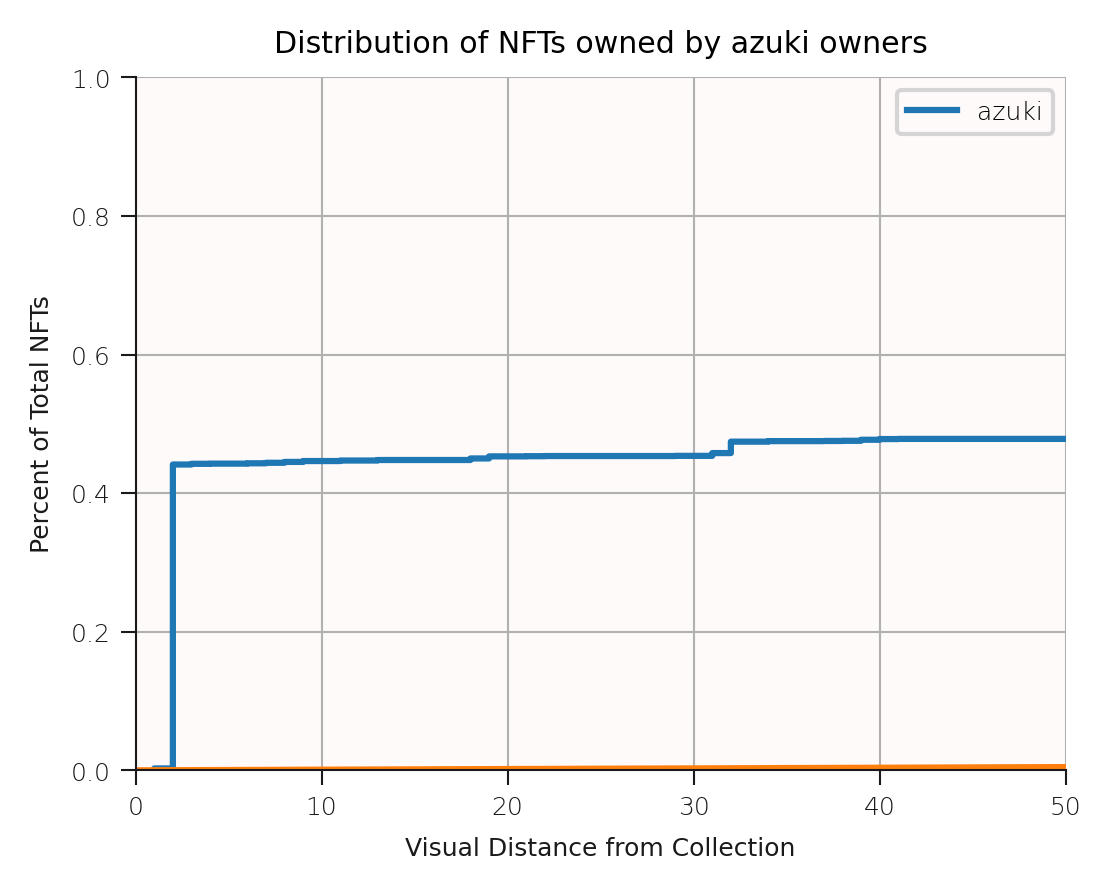

In [22]:
der = cfu.der_list_from_db(slug='azuki')
print(der)
cfu.compute_overlap_cdf('azuki',xlim=50,ylim=1,show=False,filter='owners')

In [13]:
cfu.count_overlaps('world-of-women-nft')

,slug,sorted_order,row_count
10691,world-of-women-galaxy,1,8998
708,asian-identity-collection,2,0
10238,universeofwomen,3,1524
10704,wow-pixies-v2,4,1190
5530,lovelywomens-world,5,0
...,...,...,...
5680,marfa2022,10972,1
7895,rare-earth-metals,10973,1
2857,dolce-gabbana-dgfamily-glass,10974,70
4713,immortal-pass,10975,29


In [34]:
ele_date = cfu.creation_date_from_db('kiwami-genesis')

In [35]:
ele_date

'2022-03-24'

In [51]:
len(df)


270